In [156]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import FunctionTransformer 
from sklearn.metrics import accuracy_score 
import seaborn as sns 
import scipy.stats as stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score

In [192]:
df=pd.read_csv("covid_toy.csv",usecols=["age","fever","has_covid"])
df["fever"]=df["fever"].fillna(df["fever"].mean())
df["fever"]=df["fever"].astype(int)
X=df.iloc[:,0:2]
Y=df.iloc[:,-1]
[X_train,X_test,Y_train,Y_test]=train_test_split(X,Y)
tree=DecisionTreeClassifier()
bins=KBinsDiscretizer(n_bins=10,encode="ordinal",strategy="kmeans")
bins2=KBinsDiscretizer(n_bins=10,encode="ordinal",strategy="kmeans")
tnf=ColumnTransformer([("tnf1",bins,[0]),("tnf2",bins2,[1])],remainder="passthrough")
X_train_transformed=tnf.fit_transform(X_train)
X_test_transformed=tnf.transform(X_test)
tnf.named_transformers_["tnf1"].bin_edges_
X_train_transformed=pd.DataFrame(X_train_transformed,columns=X_train.columns)

C:\Users\Shreya Sharma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Shreya Sharma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Shreya Sharma\anaconda3\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\Shreya Sharma\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in 

In [196]:
output=pd.DataFrame({"age":X_train["age"],"fever":X_train["fever"],"age_tnf":X_train_transformed.iloc[:,0],"fever_tnf":X_train_transformed.il[1]})
output["age_labels"]=pd.cut(x=X_train["age"],bins=tnf.named_transformers_["tnf1"].bin_edges_[0].tolist())
output["fever_labels"]=pd.cut(x=X_train["fever"],bins=tnf.named_transformers_["tnf2"].bin_edges_[0].tolist())
output.head()

KeyError: 0

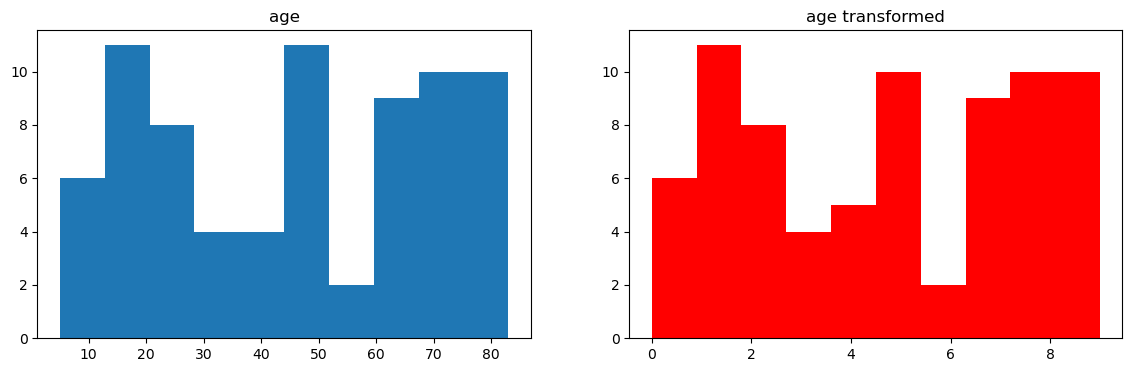

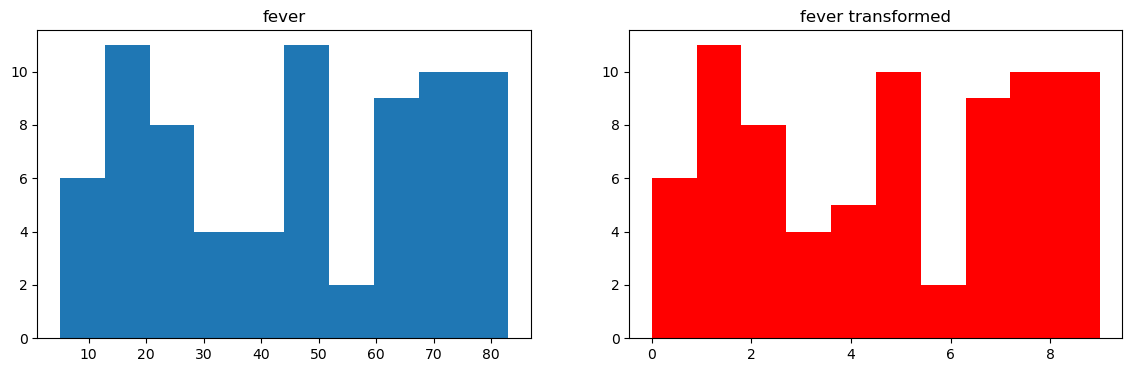

In [182]:
tree.fit(X_train,Y_train)
Y_pred=tree.predict(X_test)
accuracy_score(Y_pred,Y_test)
cross_val_score(tree,X_train,Y_train,cv=5,scoring="accuracy").mean()
for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X_train["age"])
    plt.title(col)
    plt.subplot(122)
    plt.hist(X_train_transformed["age"],color="red")
    plt.title(col+" "+"transformed")